# Data Analysis for OH<sup>-</sup>(H<sub>2</sub>O)<sub>5</sub> DMC Data

### Install necessary libraries and define constants

In [1]:
import numpy as np
import pyvibdmc as pv
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nn_dmc import *

import h5py

au_to_cm = 219474.63136320

au_to_ang = 0.529177249

h11o6_atoms = np.array([8,1,1,8,1,1,8,1,1,8,1,1,8,1,1,8,1])
h11o6_groups = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16]]

h11o6_atom_names = ['O','H','H','O','H','H','O','H','H','O','H','H','O','H','H','O','H']

path = f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning/'

### Optimized MOB-ML energies and structures for the key isomers of this complex

In [26]:
h11o6_4_1_mobml_energy = -457.86049912
energy_shift = h11o6_4_1_mobml_energy*au_to_cm

h11o6_4_1_mobml_min = np.array([-5.22071019,  0.45219087,  0.39258194, -3.79359053, 0.77731208, -0.76506451,
 -4.63783003,  1.15008802,  1.95744275,  0.13045852,  2.97610771,  2.14963861,
 -0.24565512,  2.53532275,  0.35690278,  1.45844052,  4.19441247,  2.04181715,
  4.55204562,  0.84064589, -1.95147809,  4.5837319,  -0.20433122, -0.46486598,
  2.74592397,  0.97510823, -2.30298491, -1.01837134, -3.71483304, -0.9594928,
 -2.69401462, -3.61965215, -0.27325381, -0.84004062, -2.04695746, -1.78547328,
  2.60212736, -1.9994216,   2.84261588,  1.53524363, -2.95696682,  1.70521186,
  1.7416188,  -0.38849436,  2.93411234, -0.85953764,  1.1431051,  -2.37646317,
 -1.15889846,  1.91653967, -3.98520012]).reshape(17,3)

h11o6_4_1_zpe = 29167

In [20]:
h11o6_c5_mobml_min = np.array([-4.99976143,  1.057245  ,  0.59371411, -3.58031265,  1.36848287,
       -0.60601623, -4.4786128 ,  1.76362457,  2.1785895 ,  0.11122927,
        3.93080013,  1.53538347, -0.25857121,  3.48571297, -0.24150698,
        1.64959851,  4.65021882,  2.19247899,  4.07940818,  1.83390348,
       -1.31349184,  4.49822815, -0.08698409, -1.10545191,  2.27156402,
        1.94261942, -1.70192502, -2.21347384, -3.14491978, -1.57009773,
       -3.89474416, -3.21024761, -0.93548995, -2.05006924, -1.48220658,
       -2.42431057,  2.32725425, -2.70493488, -3.38793855,  1.36315384,
       -4.22935794, -3.48285948,  1.2420602 , -1.28711127, -2.75801729,
       -0.85939069,  1.14993606, -2.38466412, -1.1462322 ,  1.93551405,
       -3.99824445]).reshape(17,3)

h11o6_c5_mobml_energy = -457.85571091

h11o6_c5_zpe = 29940

In [21]:
h11o6_c4_1_planar_mobml_min = np.array([-4.99431104,  2.85356531,  1.49841384, -3.78806373,  2.30121231,  0.1999704,
 -4.13566831,  4.31098639,  2.14685086, -0.25095006,  6.40975405,  0.3538017,
 -0.494261,    4.76417524, -0.49091439,  1.53820153,  6.52965118,  0.53783766,
  3.84723927,  2.25039946, -1.43581273,  4.43653887,  0.75193413, -0.60775798,
  1.99715772,  2.00476222, -1.61003495, -1.13982384, -2.96231938, -1.02941067,
 -2.84682627, -3.49511431, -0.7852611,  -1.22542991, -1.0830078,  -1.35947127,
  3.21907884, -4.20000279, -3.62898326,  1.62257543, -4.02975695, -2.72935147,
  3.48620193, -2.54197808, -4.30008117, -1.17129061,  1.82108788, -1.85099183,
 -1.68117426,  2.10723635, -3.56327478]).reshape(17,3)

h11o6_c4_1_planar_mobml_energy = -457.854961538757

h11o6_c4_1_planar_zpe = 29151

In [6]:
h11o6_c4_1_rotated_mobml_min = np.array([-5.04845812,  2.42349782, -0.77422458, -3.54291551,  2.50022545, -1.86801676,
 -4.37800533,  2.76867824,  0.86402186,  1.23508108,  3.60351132,  1.21491547,
  0.64696376,  3.50468305, -0.53873352,  0.70928194,  2.01423378,  1.8927728,
  3.38817222, -0.19781375, -4.0778668,   4.26918993,  0.20064136, -2.55641497,
  1.86259844,  0.93383725, -4.00549482, -3.38425664, -1.38752027, -5.54256069,
 -4.76668475, -1.35023804, -4.37166935, -2.287793,   -0.02618462, -4.91207414,
  0.72376298, -4.42918611, -2.45421359, -0.52357327, -4.06428319, -3.71392061,
  1.88443628, -3.0457136,  -2.74511358, -0.66516562,  2.5537486,  -3.54154483,
 -0.77252473,  3.7983702,  -4.84358342]).reshape(17,3)



In [22]:
h11o6_3_2_mobml_min = np.array([-5.22834269,  0.44571077,  0.38850877, -3.79846262,  0.75305581,
       -0.80831139, -4.66367366,  0.02405621,  1.91659789,  1.3068778 ,
        3.42968259,  2.04120642,  0.92702398,  2.98977328,  0.25059656,
        2.61320758,  4.6820796 ,  2.02106194, -1.44356168, -0.56816502,
        4.1468525 , -2.22331932, -1.50380615,  5.49473736,  0.13961296,
       -0.73200426,  3.75503672,  0.56744692, -3.45124437, -1.34285818,
       -1.12468932, -3.39523289, -0.70348829,  0.73287353, -1.78639577,
       -2.19257348,  3.59854851, -1.50667853,  1.99405776,  2.54988287,
       -2.51348674,  0.85750096,  2.72560849,  0.09291783,  2.17225892,
       -0.85786001,  1.1468747 , -2.38368146, -1.13470487,  1.93630773,
       -4.0062002 ]).reshape(17,3)

h11o6_3_2_mobml_energy = -457.8520851570613

h11o6_3_2_zpe = 28990

In [23]:
h11o6_3_2_up_down_mobml_min = np.array([[-5.19012673,  2.48490874,  0.50049639],
       [-4.16140358,  1.98024484, -0.94523101],
       [-4.45108731,  1.57917835,  1.8824176 ],
       [ 0.4541031 ,  1.00087936,  2.58037763],
       [ 0.02805151,  2.26507734,  1.34829982],
       [ 0.13499535, -0.57512938,  1.659691  ],
       [ 3.29150457,  2.34962092, -3.21073588],
       [ 3.64891112,  1.70686639, -1.54980549],
       [ 1.47643108,  1.99827471, -3.39986166],
       [-0.11060966, -2.69757701, -0.84596281],
       [-1.54241179, -3.81113789, -0.87347237],
       [-0.82580123, -0.97768312, -1.91210566],
       [ 3.15469913, -2.88953634, -5.10168342],
       [ 2.09084789, -3.07753297, -3.62635267],
       [ 3.48686847, -1.10703686, -5.09747675],
       [-1.69900569,  0.91067681, -3.17923094],
       [-2.18977871, -0.01829788, -4.6611643 ]])

h11o6_3_2_up_down_mobml_energy = -457.8510452237062

h11o6_3_2_up_down_zpe = 27868

In [24]:
h11o6_3_2_book_mobml_min = np.array([[-4.55830735, -0.30297528,  2.39294133],
       [-3.4110611 , -0.43614059,  0.82905158],
       [-6.03240291, -1.2998169 ,  2.09842537],
       [ 2.16414596,  2.40056691,  1.44199665],
       [ 0.82869741,  1.50611536,  0.48855338],
       [ 1.50573877,  2.50986028,  3.14001099],
       [-1.2676794 ,  1.87326783,  5.85987668],
       [-2.51859038,  1.26397435,  4.64806066],
       [-0.50547684,  0.36495257,  6.496762  ],
       [ 1.60242039, -4.15770277, -2.03695978],
       [ 0.88426855, -5.63792472, -1.28171093],
       [ 0.33584945, -2.75104714, -1.70293483],
       [ 5.9212046 , -1.49297801,  0.11248176],
       [ 4.65726321, -2.5995253 , -0.59982284],
       [ 4.99584005,  0.06382539,  0.4069089 ],
       [-1.33965098, -0.40487889, -1.13577576],
       [-1.8893165 ,  0.2100114 , -2.73679273]])

h11o6_3_2_book_mobml_energy = -457.85459788929717

h11o6_3_2_book_zpe = 28285

### Relative Energy Analysis of the various isomers

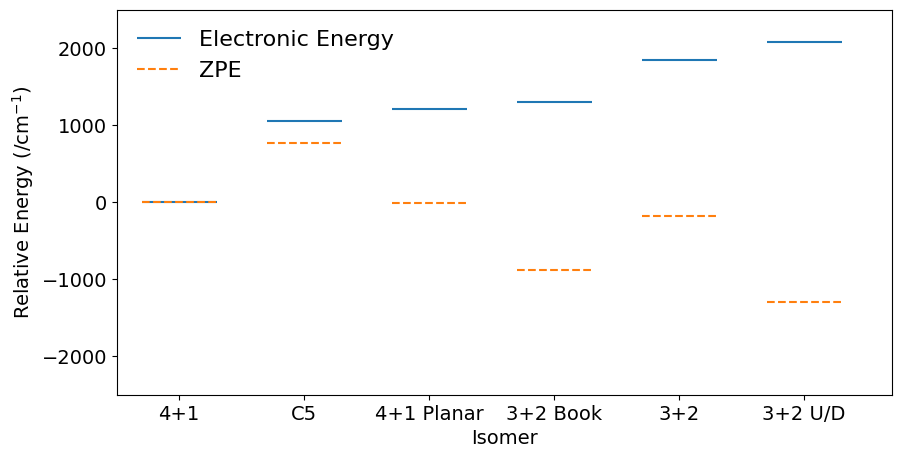

In [46]:
plt.rcParams["figure.figsize"] = [10, 5]

energy_list = [h11o6_c5_mobml_energy, h11o6_c4_1_planar_mobml_energy, h11o6_3_2_book_mobml_energy, h11o6_3_2_mobml_energy, h11o6_3_2_up_down_mobml_energy]
zpe_list = [h11o6_c5_zpe, h11o6_c4_1_planar_zpe, h11o6_3_2_book_zpe, h11o6_3_2_zpe, h11o6_3_2_up_down_zpe]

for i, energy in enumerate(energy_list):
    plt.hlines((energy-h11o6_4_1_mobml_energy)*au_to_cm, 5*(i+1), 5*(i+1)+3)
plt.hlines(0, 0, 3, label='Electronic Energy')

for i, zpe in enumerate(zpe_list):
    plt.hlines((zpe-h11o6_4_1_zpe), 5*(i+1), 5*(i+1)+3, color='tab:orange', linestyle='dashed')
plt.hlines(0, 0, 3, label='ZPE', color='tab:orange', linestyle='dashed')

plt.legend(fontsize=16, frameon=False, loc='upper left')
plt.xlabel('Isomer')
plt.xlim(-1,30)
plt.xticks(np.arange(1.5,26.5+5,5), ['4+1', 'C5', '4+1 Planar', '3+2 Book', '3+2', '3+2 U/D'])
plt.ylabel(r'Relative Energy (/cm$^{-1}$)')
plt.ylim(-2500,2500)
plt.show()

### Load in training data generated from MOB-ML DMC simulations

In [136]:
#Dictionaries for the starting timesteps of the various simulation types for each of the starting isomers
#MOB-ML has holes and has to be restarted every time it fails to converge

train_4_1_dict = {'min_starts': [[0], [0, 34]], 'reg_starts': [[0], [0], [0], [0, 528], [0]], 'wide_starts': [[0, 279, 906, 915], [0, 298, 451, 939]], 'test_starts': [[0, 988]]}
train_c5_dict = {'min_starts': [[0, 45, 374, 698, 812], [0, 944]], 'reg_starts': [[0], [0, 128, 411], [0], [0], [0]], 'wide_starts': [[0, 88, 647], [0, 198, 875]], 'test_starts': [[0, 603, 941]]}
train_3_2_dict = {'min_starts': [[0, 82], [0, 68]], 'reg_starts': [[0, 815], [0], [0, 978], [0, 728, 921], [0]], 'wide_starts': [[0, 249, 313, 877], [0, 683]], 'test_starts': [[0, 473]]}

In [153]:
isomer = 'c5'
sim_type = 'reg'
sim_num = 2

if isomer == '3_2':
    train_dict = train_3_2_dict
elif isomer == '4_1':
    train_dict = train_4_1_dict
elif isomer == 'c5':
    train_dict = train_c5_dict
else:
    print("Not a valid isomer name")


train_energies_list = []
train_cds_list = []

if sim_type == 'min':
    sim = '500w_1000ts_1dt'
    starts = train_dict['min_starts'][sim_num - 1]
    end = 1000
elif sim_type == 'wide':
    sim = '1000w_1000ts_10dt'
    starts = train_dict['wide_starts'][sim_num - 1]
    end = 1000
elif sim_type == 'reg':
    if sim_num in [1, 2]:
        sim = '200w_5000ts_10dt'
        end = 1000
    else:
        sim = '200w_1000ts_10dt'
        end = 1000

    starts = train_dict['reg_starts'][sim_num - 1]

elif sim_type == 'test':
    sim = '1000w_1000ts_10dt_min'
    starts = train_dict['test_starts'][sim_num - 1]
    end = 1000

else:
    print("Not a valid sim type")

print(f'starting {isomer} {sim_type} sim number {sim_num}')

for j in range(len(starts)):
    print(f'starting at timestep {starts[j]}')

    path = f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/mobml_pyscf/{isomer}_min/sim_{sim_num}/{sim}_{starts[j]}_start'

    training_sim = pv.SimInfo(f'{path}/h11o6_0_sim_info.hdf5')
    
    if j+1 < len(starts):
        for b in range(starts[j+1]-starts[j]):
            cds,energies = training_sim.get_training(f'{path}/h11o6_0_training_{b}ts.hdf5',ret_ang=False, ret_cm=True)
            
            train_cds_list.append(cds)
            train_energies_list.append(energies-energy_shift) #record energy relative to 4+1 minimum
            
            #print(f'snapshot {b+starts[j]} done')
    else:
        for b in range(end-starts[j]):
            cds,energies = training_sim.get_training(f'{path}/h11o6_0_training_{b}ts.hdf5',ret_ang=False, ret_cm=True)
            
            train_cds_list.append(cds)
            train_energies_list.append(energies-energy_shift)
            
            #print(f'snapshot {b+starts[j]} done')
     


starting c5 reg sim number 2
starting at timestep 0
starting at timestep 128
starting at timestep 411


In [154]:
train_energies = np.concatenate(train_energies_list)
train_cds = np.concatenate(train_cds_list)

In [155]:
#check energy range of simulation
print(np.min(train_energies), np.max(train_energies))

2029.4096198827028 94490.35169012845


In [156]:
np.save(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning/h11o6/training_data/h11o6_{isomer}_mobml_{sim_type}_sim_{sim_num}_training_cds.npy',train_cds)
np.save(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning/h11o6/training_data/h11o6_{isomer}_mobml_{sim_type}_sim_{sim_num}_training_energies.npy',train_energies)

### Create full training data sets

In [6]:
def make_training_set(isomers, sim_types, sim_nums):
    """
    Function that takes in specified MOB-ML simulations for the isomers of OH-W5
    to form a training data set for NN training

    example input:
    isomers = ['c5']
    sim_types = ['min', 'wide', 'reg']
    sim_nums = [[1], [1], [1,2,3,4,5]]

    Returns coordinates array and energies array 
    """
    path = f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning/h11o6/training_data'

    total_cds = []
    total_energies = []

    for isom in isomers:
        for i, sim in enumerate(sim_types):
            for num in sim_nums[i]:
                cds = np.load(f'{path}/h11o6_{isom}_mobml_{sim}_sim_{num}_training_cds.npy')
                energies = np.load(f'{path}/h11o6_{isom}_mobml_{sim}_sim_{num}_training_energies.npy')

                total_cds.append(cds)
                total_energies.append(energies)

    total_cds = np.concatenate(total_cds)
    total_energies = np.concatenate(total_energies)

    return total_cds, total_energies

In [ ]:
# Load in DMC snapshot data, skipping over timesteps that failed

h11o6_snapshot_cds = np.load(f'{path}/h11o6/training_sets/h11o6_3_2_unguided_100k_75kts_snapshot.npy')
h11o6_dmc_cds = []
h11o6_dmc_energies = []
for i in np.arange(0, len(h11o6_snapshot_cds), 1000):
    try:
        energy = np.load(f'{path}/h11o6/training_sets/h11o6_snapshots/{i}-{i+1000}_3_2_energies.npy')
        h11o6_dmc_energies.append(energy)
        h11o6_dmc_cds.append(h11o6_snapshot_cds[i:i+1000])
    except:
        print(f'Skipping {i}-{i+1000}')
        continue
h11o6_dmc_energies = np.concatenate(h11o6_dmc_energies)*au_to_cm - energy_shift
h11o6_dmc_cds = np.concatenate(h11o6_dmc_cds)

np.save(f'{path}/h11o6/training_data/h11o6_3_2_dmc_energies.npy', h11o6_dmc_energies)
np.save(f'{path}/h11o6/training_data/h11o6_3_2_dmc_cds.npy', h11o6_dmc_cds)

### Compare energy distributions between the different parts of the training data

In [218]:
def plot_training_data(isomer):

    _, train_min_energies = make_training_set([isomer], ['min'], [[1]])
    _, train_wide_energies = make_training_set([isomer], ['wide'], [[1]])
    _, train_reg_energies = make_training_set([isomer], ['reg'], [[1,2,3,4,5]])
    _, train_test_energies = make_training_set([isomer], ['test'], [[1]])

    dmc_energies = np.load(f'{path}/h11o6/training_data/h11o6_{isomer}_dmc_energies.npy')

    n, bins = np.histogram(train_min_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} min')

    n, bins = np.histogram(train_wide_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} wide')

    n, bins = np.histogram(train_reg_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} reg')

    n, bins = np.histogram(train_test_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} test')

    n, bins = np.histogram(dmc_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} DMC')

    plt.xlabel(r'MOB-ML Energy (/cm$^{-1}$)')
    plt.ylabel('Density of Points')
    plt.xlim(0, 80000)
    plt.ylim(0, 6e-5)
    plt.legend()
    plt.show()

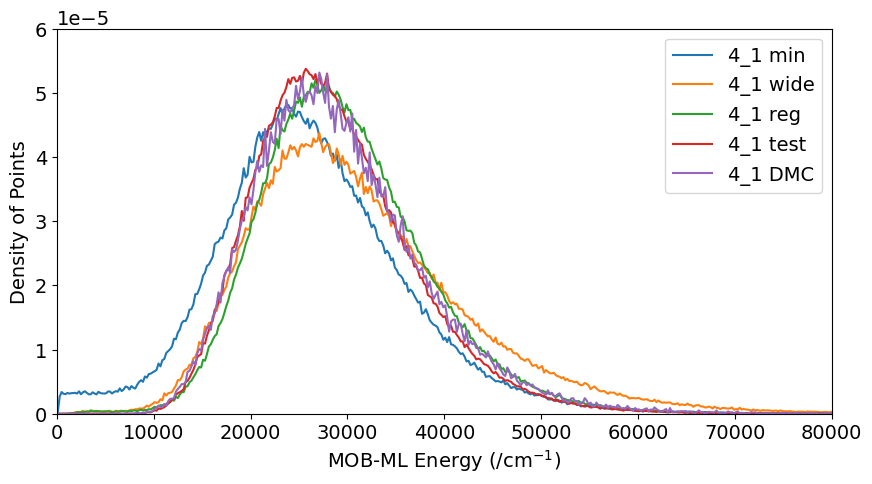

In [219]:
plot_training_data('4_1')

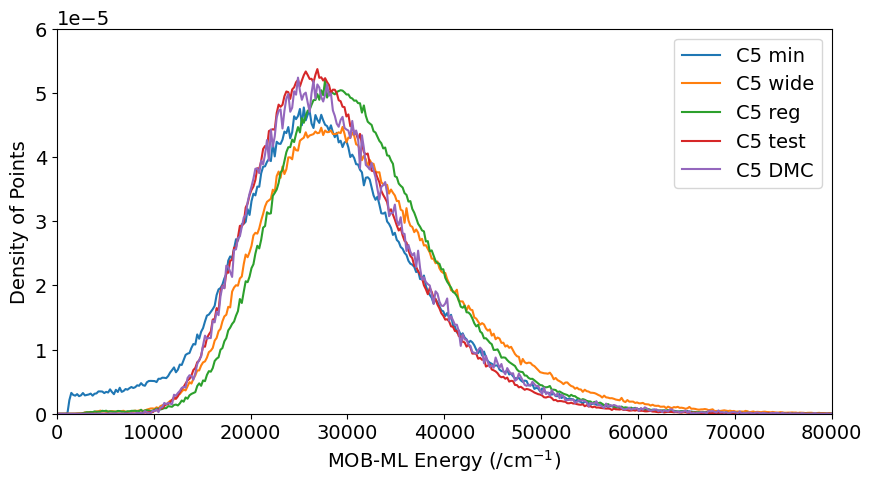

In [220]:
plot_training_data('C5')

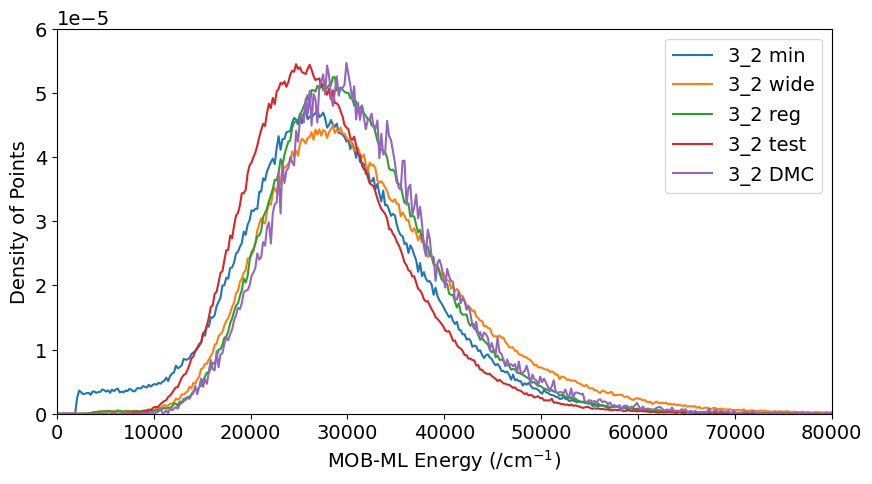

In [221]:
plot_training_data('3_2')

### PCA Analysis of Training Features

In [13]:
# Load in 
sim_type = 'reg'
reg_cds, reg_energies = make_training_set(['c5','4_1','3_2'], [sim_type], [[1,2,3,4,5]])

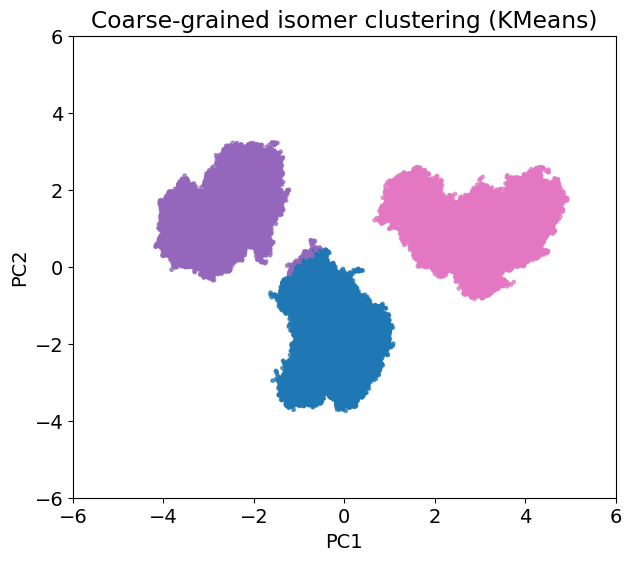

In [10]:
# --------------------------------------------------------
# 1. Load coordinates & extract Oxygens
# --------------------------------------------------------

coords = reg_cds

oxygen_idx = [0, 3, 6, 9, 12, 15]
oxygen_coords = coords[:, oxygen_idx, :]  # shape: (N,6,3)
N, nO, _ = oxygen_coords.shape

# --------------------------------------------------------
# 2. Compute pairwise O–O distance vectors
# --------------------------------------------------------
dist_vectors = np.array([pdist(oxygen_coords[i]) for i in range(N)])
# Standardize
dist_vectors = (dist_vectors - dist_vectors.mean(axis=0)) / dist_vectors.std(axis=0)

# --------------------------------------------------------
# 3. Optional: reduce dimensionality for visualization
# --------------------------------------------------------
pca = PCA(n_components=5)
X_pca = pca.fit_transform(dist_vectors)

# --------------------------------------------------------
# 4. Cluster into a small number of isomers
# --------------------------------------------------------
n_isomers = 3  # coarse-grain into 4 main clusters
kmeans = KMeans(n_clusters=n_isomers, n_init=50, random_state=0)
labels = kmeans.fit_predict(X_pca)

# --------------------------------------------------------
# 5. Plot PC1 vs PC2
# --------------------------------------------------------
plt.figure(figsize=(7,6))
plt.xlim(-6, 6)
plt.ylim(-6, 6)

# Define the colors you want for each cluster
cluster_colors = {
    0: "tab:blue",
    1: "tab:purple",
    2: "tab:pink",
    #3: "tab:red"
}

# Map labels to colors
colors = [cluster_colors[lbl] if lbl in cluster_colors else "gray" for lbl in labels]

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, s=6, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Coarse-grained isomer clustering (KMeans)")
plt.show()

# --------------------------------------------------------
# 6. Identify representative / centroid geometries per cluster
# --------------------------------------------------------
# coords: full 17-atom geometries
# labels: cluster assignments from KMeans
n_clusters = len(np.unique(labels))
centroid_geometries_full = []

for lbl in range(n_clusters):
    cluster_idx = np.where(labels == lbl)[0]  # indices of structures in this cluster
    cluster_coords = coords[cluster_idx]      # shape: (n_cluster, 17, 3)
    centroid = cluster_coords.mean(axis=0)    # shape: (17, 3)
    centroid_geometries_full.append(centroid)

# Convert to array
centroid_geometries_full = np.array(centroid_geometries_full)  # shape: (n_clusters, 17, 3)

In [14]:
for i, geom in enumerate(centroid_geometries_full):
    save_xyz_file(f'{path}/h11o6/geometries/h11o6_{sim_type}_pca_{n_isomers}_isomer_{i+1}.xyz', h11o6_atom_names, centroid_geometries_full[0]*au_to_ang)

### NN Model Error Analysis

c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret 

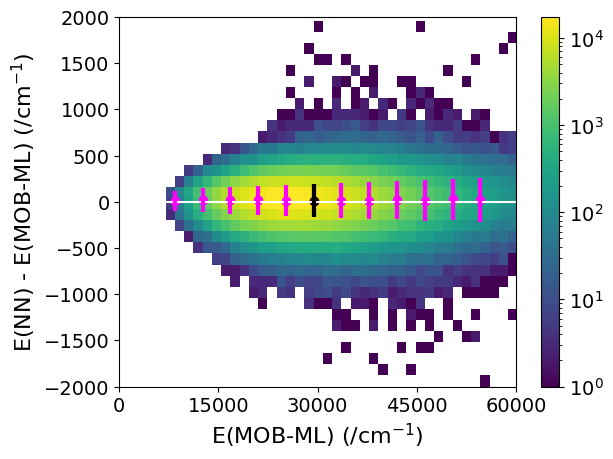

MAE: 136.59, average error: 12.63


In [ ]:
plot_egnn_2d_pred_errors(f"{path}/h11o6/models/egnn/h11o6_egnn_4_1_64_3_3_ln_best.pth",
                    f"{path}/h11o6/training_data/h11o6_4_1_mobml_test_sim_1_training_cds.npy",
                    f"{path}/h11o6/training_data/h11o6_4_1_mobml_test_sim_1_training_energies.npy")

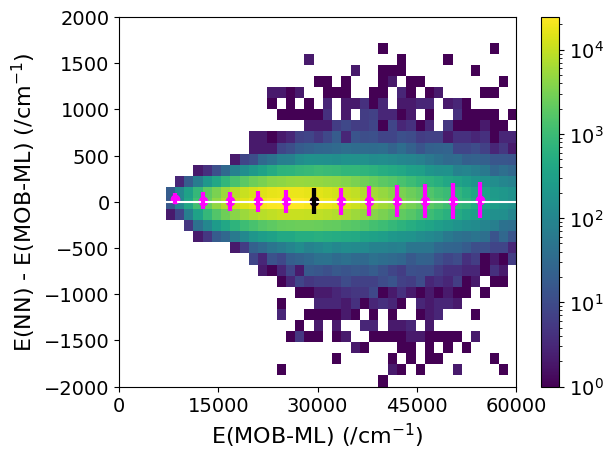

MAE: 99.96, average error: 6.36


In [ ]:
plot_egnn_2d_pred_errors(f"{path}/h11o6/models/egnn/h11o6_egnn_c5_64_3_3_ln_best.pth",
                    f"{path}/h11o6/training_data/h11o6_c5_mobml_test_sim_1_training_cds.npy",
                    f"{path}/h11o6/training_data/h11o6_c5_mobml_test_sim_1_training_energies.npy")

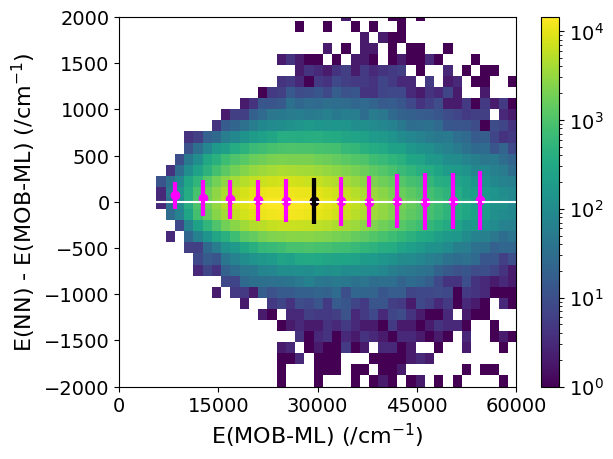

MAE: 186.92, average error: 12.46


In [ ]:
plot_egnn_2d_pred_errors(f"{path}/h11o6/models/egnn/h11o6_egnn_3_2_64_3_3_ln_best.pth",
                    f"{path}/h11o6/training_data/h11o6_3_2_mobml_test_sim_1_training_cds.npy",
                    f"{path}/h11o6/training_data/h11o6_3_2_mobml_test_sim_1_training_energies.npy")

### DMC Simulation Analysis

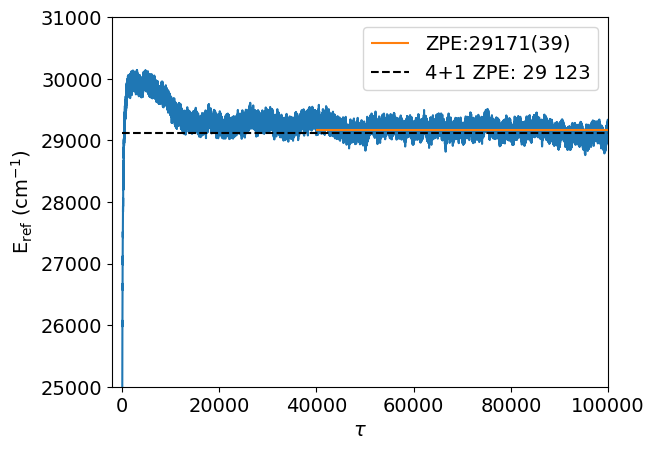

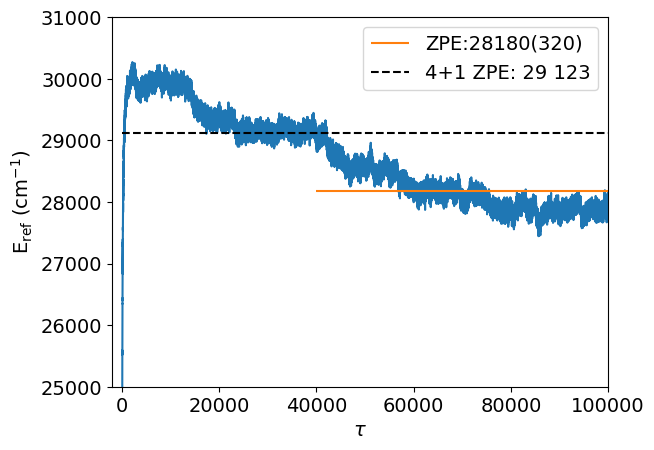

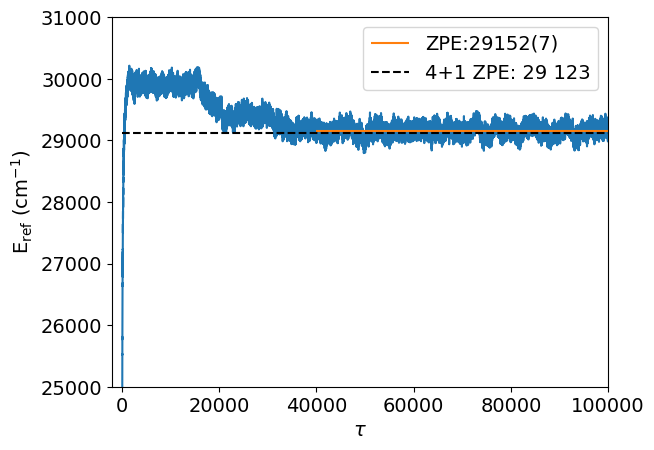

28834.315133280685 462.5265351774363


In [27]:
import numpy as np
import pyvibdmc as pv
ZPEs = []
ZPEs_2 = []
walkers = 100000
timesteps = 100000
tau = np.linspace(0,timesteps,timesteps)
for i in range(3):
    #tutorial_sim = pv.SimInfo('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/h2o_guided/1.0w_100000_walkers_50000t_1dt/H11O6_{2}_sim_info.hdf5'.format(walkers,timesteps,i))
    tutorial_sim = pv.SimInfo('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/EGNN_Data/c5_start/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided/1.0w_100000_walkers_100000t_1dt/H11O6_{2}_sim_info.hdf5'.format(walkers,timesteps,i))
    #ZPE = tutorial_sim.get_zpe(onwards=20000, ret_cm=True)
    #ZPEs.append(ZPE)

    vref = tutorial_sim.get_vref(ret_cm=True)

    means = []
    for j in range(40000,100000,10000):
        mean = np.mean(vref[j:j+10000,1])
        means.append(mean)

    std = np.std(means)
    
    plt.plot(tau,vref[:,1],
             #label=f'ZPE: {ZPE:.0f}({std:.0f})'
             )
    
    ZPE = np.mean(vref[40000:100000,1])
    ZPEs.append(ZPE)
    #plt.hlines(ZPE_1,20000,50000,color='black',label=f'ZPE: {ZPE_1:.0f}({std:.0f})')

    """tutorial_sim = pv.SimInfo('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/c5_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/unguided/1.0w_100000_walkers_50000t_1dt/H11O6_{2}_sim_info.hdf5'.format(walkers,timesteps,i))
    ZPE = tutorial_sim.get_zpe(onwards=35000, ret_cm=True)
    ZPEs.append(ZPE)

    tau = np.linspace(0,50000,50000)

    means = []
    for j in range(35000,50000,5000):
        mean = np.mean(vref[j:j+5000,1])
        means.append(mean)

    std = np.std(means)

    vref = tutorial_sim.get_vref(ret_cm=True)"""
    
    #plt.plot(tau,vref[:,1],
    #         label=f'ZPE: {ZPE:.0f}({std:.0f})'
    #         )
    
    plt.hlines(ZPE,40000,100000,color='tab:orange',label=f'ZPE:{ZPE:.0f}({std:.0f})')
    plt.hlines(29123, 0,100000,color='black',linestyle='dashed',label='4+1 ZPE: 29 123')

    plt.ylabel(r'E$_\mathrm{ref}$ (cm$^{-1}$)')
    plt.xlabel(r'$\tau$')
    #plt.xticks(np.arange(0,200000,50000))
    plt.xlim(-2000,100000)
    plt.ylim(25000,31000)
    plt.legend()
    plt.show()

print(np.mean(ZPEs), np.std(ZPEs))


In [29]:
np.std([29166, 29156, 29152])

np.float64(5.887840577551898)

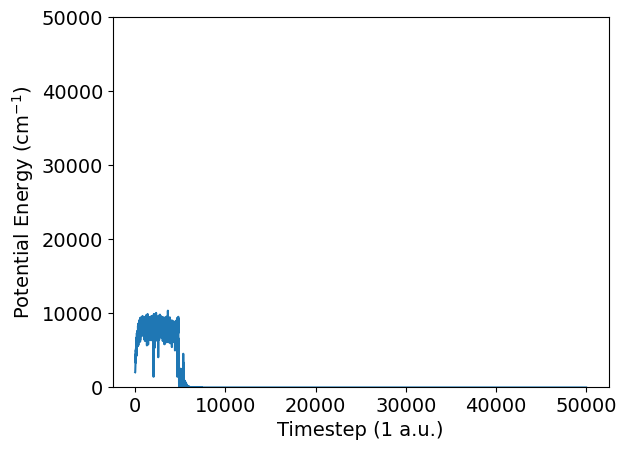

In [12]:
highest, lowest, average, num_walkers, local = parse_log_file('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/unguided/1.0w_100000_walkers_50000t_1dt/H11O6_1_log.txt')

vref = []
for i in range(len(average)):
    v = average[i] - (0.5)*(num_walkers[i] - 100000)/100000
    vref.append(v)
#plt.plot(np.arange(0,len(vref),1),vref)
plt.plot(np.arange(0,len(lowest),1),lowest)
#plt.hlines(1000, 0, 50000, color='black', linestyle='dashed')
plt.ylim(0,50000)
#plt.xlim(-2000,52000)
plt.xlabel('Timestep (1 a.u.)')
plt.ylabel('Potential Energy (cm$^{-1}$)')
plt.show()

In [7]:
test_x = np.load('./h11o6/training_sets/h11o6_mobml_10_test_no_sort_revised_X_c5.npy')
train_x = np.load('./h11o6/training_sets/h11o6_mobml_full_training_no_sort_revised_X_c5.npy')

means = np.mean(train_x,axis=0)
stds = np.std(train_x,axis=0)

with np.errstate(divide='ignore', invalid='ignore'):
    standard_X_test = (test_x - means)/stds

In [8]:
np.save('./h11o6/training_sets/h11o6_mobml_10_test_no_sort_revised_X_c5_standardized.npy',standard_X_test)

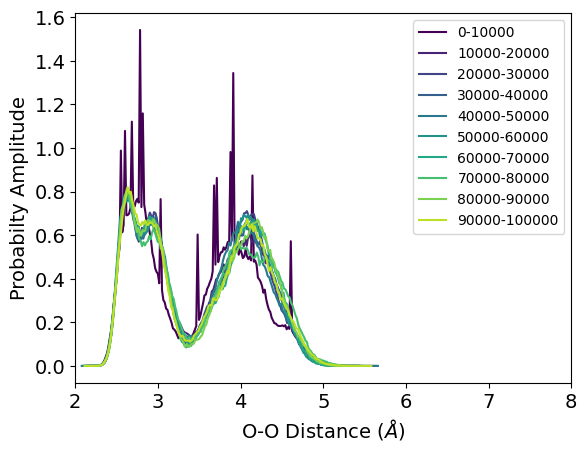

In [11]:
starts = np.arange(0,100000,10000)

# Choose a colormap (e.g., viridis, plasma, inferno, magma, cividis, etc.)
cmap = plt.cm.viridis

# Generate a list of colors from the colormap
colors = [cmap(i / len(starts)) for i in range(len(starts))]

for i in range(len(starts)):

    snapshots = np.arange(starts[i],starts[i]+5000,500)

    tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/h2o_guided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
    coords, weights = tutorial_sim.get_wfns(snapshots)
    coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

    analyzer = pv.AnalyzeWfn(coords)

    OOs = [[0,3],[0,6],[0,9],[0,12],[0,15],[3,6],[3,9],[3,12],[3,15],[6,9],[6,12],[6,15],[9,12],[9,15],[12,15]]

    oo_cumulative = []
    total_dws = []
    for pair in OOs:
        bond_length = analyzer.bond_length(pair[0],pair[1])
        oo_cumulative.append(bond_length)
        total_dws.append(weights)

    oo_total = np.concatenate(oo_cumulative)
    total_dws = np.concatenate(total_dws)

    n, bins = np.histogram(oo_total,weights=total_dws,bins=200,density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    oo_eq_c5_ave = [3.0384,2.7884,4.8622]

    #oo_eq_3_2 = [4.137,3.031,3.716,4.610,2.682,3.474,3.872,2.780,2.596,3.910,2.783,3.905,2.821,2.557,3.686]
    oo_eq_4_1 = [3.266,5.322,3.212,4.528,2.758,3.385,3.951,2.963,2.637,3.844,3.124,2.877,2.923,2.679,3.708]

    #plt.vlines(oo_eq_c5_ave,0,0.2,color='tab:orange')
    #plt.vlines(oo_eq_4_1,0,0.2,color='magenta')
    plt.plot(bin_centers,n,color=colors[i],label=f'{starts[i]}-{starts[i]+10000}')

plt.legend(fontsize=10)
plt.xlim(2,8)
plt.xlabel(r'O-O Distance ($\AA$)')
#plt.ylim(0,1)
plt.ylabel('Probabilty Amplitude')
plt.show()

In [53]:
file = 'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/EGNN_Data/c5_start/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided/1.0w_100000_walkers_100000t_1dt/wfns/H11O6_1_wfn_79000ts.hdf5'

In [18]:
f = h5py.File(file, "r")
for key in f.keys():
       print(key)

coords
desc_wts


In [21]:
cds = f['coords']
weights = f['desc_wts']

In [2]:
max_cds = get_max_wt_wfn('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/EGNN_Data/3_2_up_down_start/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided/1.0w_100000_walkers_100000t_1dt/wfns/H11O6_0_wfn_25000ts.hdf5')

In [4]:
save_xyz_file(f'{path}/h11o6/geometries/h11o6_3_2_up_down_guided_0_max_25kts.xyz',h11o6_atom_names,max_cds*au_to_ang)

In [44]:
cart_to_pot_fast(np.array([max_cds]))

array([10769.676], dtype=float32)

In [46]:
-457.79470595*au_to_cm - energy_shift

14439.931731969118

In [85]:
h11o6_c5_snapshot_cds = np.load('./h11o6/training_sets/h11o6_c5_unguided_100k_125kts_snapshot.npy')

In [186]:
h11o6_c5_snapshot_energies = []
for i in np.arange(0, len(h11o6_c5_snapshot_cds), 1000):
    try:
        energy = np.load(f'{path}/h11o6/training_sets/h11o6_snapshots/{i}-{i+1000}_c5_energies.npy')
        h11o6_c5_snapshot_energies.append(energy)
    except:
        print(f'Skipping {i}-{i+1000}')
        continue
h11o6_c5_snapshot_energies = np.concatenate(h11o6_c5_snapshot_energies)*au_to_cm - energy_shift

NameError: name 'h11o6_c5_snapshot_cds' is not defined

In [50]:
len(h11o6_3_2_snapshot_energies)

41000

In [87]:
first = h11o6_c5_snapshot_cds[:60000]
second = h11o6_c5_snapshot_cds[65000:79000]
h11o6_c5_snapshot_cds_part = np.concatenate([first,second])

In [76]:
h11o6_4_1_snapshot_cds_part.shape

(79000, 17, 3)

In [64]:
read_xyz_file('./h11o6/geometries/c5_isom_current.xyz')

array([[-4.99431104,  2.85356531,  1.49841384],
       [-3.78806373,  2.30121231,  0.1999704 ],
       [-4.13566831,  4.31098639,  2.14685086],
       [-0.25095006,  6.40975405,  0.3538017 ],
       [-0.494261  ,  4.76417524, -0.49091439],
       [ 1.53820153,  6.52965118,  0.53783766],
       [ 3.84723927,  2.25039946, -1.43581273],
       [ 4.43653887,  0.75193413, -0.60775798],
       [ 1.99715772,  2.00476222, -1.61003495],
       [-1.13982384, -2.96231938, -1.02941067],
       [-2.84682627, -3.49511431, -0.7852611 ],
       [-1.22542991, -1.0830078 , -1.35947127],
       [ 3.21907884, -4.20000279, -3.62898326],
       [ 1.62257543, -4.02975695, -2.72935147],
       [ 3.48620193, -2.54197808, -4.30008117],
       [-1.17129061,  1.82108788, -1.85099183],
       [-1.68117426,  2.10723635, -3.56327478]])